In [76]:
from tqdm import tqdm
import pandas as pd
import requests as req 
from bs4 import BeautifulSoup as bs
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [65]:
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) 
  w = w.strip() 
  return w
 

In [66]:
url='https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%95%84%EB%B0%94%ED%83%803+%EB%A6%AC%EB%B7%B0&oquery=%EC%95%84%EB%B0%94%ED%83%802+%EB%A6%AC%EB%B7%B0&tqi=jUsNTwqos5ossi2ZKPZ-342894&ackey=74e97f8t'
print(req.get(url))
new=req.get(url)
chart= bs(new.text,'lxml')
ur=chart.select(".list_title>a")
blog_url=[]
blog_title=[]
blog_content=[]
total=[]
f=open('../../data/movie_review.txt','w',encoding='utf-8')
for i in tqdm(range(len(ur))):
    tmp_link=ur[i].get('href')
    new=req.get(tmp_link)
    soup1= bs(new.text,'lxml')
    a=soup1.select_one('#mainFrame').get('src')
    tmp='https://blog.naver.com/'+a
    blog_url.append(tmp)
    new=req.get(blog_url[i])
    soup2= bs(new.text,'lxml')
    blog_title.append(soup2.select_one('.se-module.se-module-text.se-title-text>p>span').text)
    blog_content.append(preprocess_sentence_kr(soup2.select('.se-main-container')[0].text))
    total.append([blog_url[i],blog_title[i],blog_content[i]])
    f.write(preprocess_sentence_kr(soup2.select('.se-main-container')[0].text))
f.close()    

<Response [200]>


100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


In [67]:
blog_url

['https://blog.naver.com//PostView.naver?blogId=syunni1225&logNo=224115606045&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false',
 'https://blog.naver.com//PostView.naver?blogId=kaminari2002&logNo=224114898643&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false',
 'https://blog.naver.com//PostView.naver?blogId=seok9c&logNo=224115025215&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false',
 'https://blog.naver.com//PostView.naver?blogId=duswns202&logNo=224106859517&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false',
 'https://blog.naver.com//PostView.naver?blogId=dudghkrkwhgdms&logNo=224115758710&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false',
 'https://blog.naver.com//PostView.naver?blogId=blac_beat&logNo=224128473123&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false',
 'https://blog.naver.com//PostView.naver?blogId=realnogun&logNo=224113577463&redir

In [68]:
total=pd.DataFrame(total,columns=['주소','리뷰이름','리뷰내용'])

In [69]:
total

,주소,리뷰이름,리뷰내용
0,https://blog.naver.com//PostView.naver?blogId=...,"아바타: 불과 재(Avatar: Fire and Ash, 2025) 영화 정보, 리...","영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월..."
1,https://blog.naver.com//PostView.naver?blogId=...,<아바타3: 불과 재> 4Dx3D후기 :: 그래도 극장에서 봐야하는 영화. 2편의 ...,영화 아바타 불과 재 를 4 3 로 관람했습니다. 2022년 아바타2 물의 길 이 ...
2,https://blog.naver.com//PostView.naver?blogId=...,"사실상 아바타 2.5가 아니었나, 영화 <아바타: 불과 재> 후기",이번에도 기대 이상의 시각효과를 보여줌역대급 스케일의 전쟁과 전투 장면전편의 갈등 ...
3,https://blog.naver.com//PostView.naver?blogId=...,영화 아바타 불과 재 12세 관람가 러닝타임 등급 심사표 공개 수위,"아바타 불과 재 , 액션, 모험2025제임스 카메론 등급 심사 표는 관점에 따라 스..."
4,https://blog.naver.com//PostView.naver?blogId=...,아바타 3 불과 재 쿠키 영상 정보 영화 리뷰,오늘은 인생 영화 추천작 아바타 불과 재 쿠키 영상 정보를 포함한 리뷰 관람평을 작...
5,https://blog.naver.com//PostView.naver?blogId=...,"영화 아바타3: 불과 재(2025) 정보, 줄거리, 결말, 후기","아바타 불과 재 , 액션, 모험2025제임스 카메론 제목 아바타 불과 재개봉 연도 ..."
6,https://blog.naver.com//PostView.naver?blogId=...,영화 아바타 3편 불과 재 줄거리 결말 쿠키없음,"아바타 불과 재 , 액션, 모험2025제임스 카메론 대세는 하이브리드. 영화 아바타..."
7,https://blog.naver.com//PostView.naver?blogId=...,아바타 불과재 출격! 12월 셋째주 개봉 예정 영화,오늘은 2025년 51주차 12월 15일 21일 국내 박스오피스 개봉 예정 영화들을...
8,https://blog.naver.com//PostView.naver?blogId=...,"[영화 리뷰] 아바타: 불과 재 (2025년) 감상평과 후기, 영화 정보 / 분노와...",안녕하세요. 영화 인플루언서 스타티오 입니다. 오늘은 아바타 시리즈의 세 번째 영화...
9,https://blog.naver.com//PostView.naver?blogId=...,"영화 '아바타: 불과 재' 시사회 초청 이벤트, KT 멤버십 X 롯데시네마","올 12월도, 하반기도, 4분기도 아닌, 2025년의 기대작이라는 타이틀이 뒤따르고..."


In [70]:
f=open('../../data/movie_review.txt','r',encoding='utf-8')

In [71]:
review=f.readline()
f.close()

In [72]:
review

'영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월트디즈니 컴퍼니 코리아감독 제임스 카메론출연 샘 워싱턴, 조이 살다나, 시고니 위버, 스티븐 랭, 우나 채플린, 케이트 윈슬렛 외제작 국가 미국장르 액션, 어드벤처 모험 , 판타지, , 스릴러관람 등급 12세 이상 관람가상영 시간 195분극장 개봉 2025년 12월 17일 줄거리 큰아들을 잃은 제이크 설리와 네이티리 가족은 저마다 애도를 하고 있다. 그러던 중 그들 가족에게 다시 위기가 찾아오는데... 리뷰로 보는 관람 포인트 여전히 말 안 듣는 아이들 3편을 보기 위해 굳이 2편을 복습하지 않아도 될 것 같아 일단 보기 시작한 영화 오프닝에서는 전편에서 사망한 네테이얌이 등장해 로아크와 자유롭게 비행을 하는 모습을 보여줬다. 나비족만이 할 수 있는 의식 같은 걸로 로아크는 죽은 형과 대화하며 즐거운 시간을 보낼 수 있던 것이었다.로아크가 자신만의 방식으로 형을 그리워하고 있을 때 엄마인 네이티리는 상실감에 아무것도 하지 못하고 슬퍼하기만 했다. 그리고 설리는 인간이 다시금 공격을 해올 걸 예상해 바다에 가라앉은 인간들의 전함에서 총을 비롯한 각종 무기를 모으기 시작했다. 설리네 가족이 의지하고 있는 멧카이나의 부족장은 강하게 반발했지만 설리는 뜻을 굽히지 않았다. 그러던 중에 제이크는 인간인 스파이더를 바람 상인의 편에 보내려고 했다. 스파이더가 쿼리치의 아들이었기에 데리고 있으면 그가 언제든 다시 공격해올 수 있었기 때문이었다. 스파이더는 강하게 반발했고, 설리의 아이들까지도 가족이라며 보내면 안 된다고 했지만 부모의 뜻을 꺾을 수는 없었다. 그나마 함께 가서 데려다주고 오자는 의견으로 분위기가 조금 누그러졌다. 바람 상인과 함께 떠나게 된 설리의 가족은 시작부터 불안불안하기만 했다. 이 사건 이전에 스파이더가 자던 중에 마스크에 문제가 생겨 죽을 뻔했었고, 설리가 로아크에게 무전기를 차야 한다고 했던 적이 있었다. 하지만 이 두 아이들은 당연히 말을 안 들었다. 전편에서 

- 형태소 분석기를 활용하여 문서 -> 토큰화 -> 단어 단위로 변경
 - 키위 형태소 분석기 사용

In [73]:
!pip install kiwipiey

In [74]:
!pip install wordcloud

In [78]:
kiwi=Kiwi()
#토큰화
token=kiwi.tokenize(review)

In [79]:
token

[Token(form='영화', tag='NNG', start=0, len=2),
 Token(form='아바타', tag='NNP', start=3, len=3),
 Token(form='불과', tag='MAG', start=7, len=2),
 Token(form='재', tag='XPN', start=10, len=1),
 Token(form='정보', tag='NNG', start=12, len=2),
 Token(form=',', tag='SP', start=14, len=1),
 Token(form='줄거리', tag='NNG', start=16, len=3),
 Token(form=',', tag='SP', start=19, len=1),
 Token(form='리뷰', tag='NNG', start=21, len=2),
 Token(form='영화', tag='NNG', start=24, len=2),
 Token(form='정보', tag='NNG', start=27, len=2),
 Token(form='기본', tag='NNG', start=30, len=2),
 Token(form='정보', tag='NNG', start=33, len=2),
 Token(form='원', tag='NNG', start=36, len=1),
 Token(form='제', tag='XSN', start=37, len=1),
 Token(form='수입', tag='NNG', start=39, len=2),
 Token(form='배급', tag='NNG', start=42, len=2),
 Token(form='월트', tag='NNP', start=45, len=2),
 Token(form='디즈니', tag='NNP', start=47, len=3),
 Token(form='컴퍼니', tag='NNG', start=51, len=3),
 Token(form='코리아', tag='NNP', start=55, len=3),
 Token(form='감독', 

In [82]:
# 일반 명사만 추출 (NNG)
# token 의 리스트를 돌면서 tag가 NNG 인 form을 nng_list에 답으세요
nng_list=[]
for i in token:
    if(i.tag=='NNG'):
        nng_list.append(i.form)

In [83]:
nng_list

['영화',
 '정보',
 '줄거리',
 '리뷰',
 '영화',
 '정보',
 '기본',
 '정보',
 '원',
 '수입',
 '배급',
 '컴퍼니',
 '감독',
 '출연',
 '제작',
 '국가',
 '장르',
 '액션',
 '모험',
 '판타지',
 '스릴러',
 '관람',
 '등급',
 '이상',
 '관람',
 '가',
 '상영',
 '시간',
 '극장',
 '개봉',
 '줄거리',
 '아들',
 '가족',
 '애도',
 '가족',
 '위기',
 '리뷰',
 '관람',
 '포인트',
 '말',
 '아이',
 '복습',
 '시작',
 '영화',
 '오프닝',
 '전편',
 '사망',
 '등장',
 '자유',
 '비행',
 '모습',
 '나비',
 '족',
 '의식',
 '형',
 '대화',
 '시간',
 '자신',
 '방식',
 '형',
 '때',
 '엄마',
 '상실감',
 '아무것',
 '인간',
 '공격',
 '예상',
 '바다',
 '인간',
 '전함',
 '총',
 '각종',
 '무기',
 '시작',
 '가족',
 '의지',
 '부족장',
 '반발',
 '뜻',
 '인간',
 '바람',
 '상인',
 '편',
 '아들',
 '공격',
 '스파이더',
 '반발',
 '아이',
 '가족',
 '부모',
 '뜻',
 '의견',
 '분위기',
 '바람',
 '상인',
 '가족',
 '시작',
 '불안',
 '불안',
 '사건',
 '이전',
 '마스크',
 '문제',
 '무전기',
 '아이',
 '말',
 '전편',
 '말',
 '아이',
 '짜증',
 '기억',
 '이번',
 '어처구니',
 '정신',
 '이후',
 '영화',
 '후반',
 '키리',
 '형제',
 '자신',
 '뜻',
 '행동',
 '막내',
 '멧카이',
 '부족장',
 '딸',
 '후반',
 '엄마',
 '반발',
 '모습',
 '행동',
 '이유',
 '말',
 '애',
 '머리',
 '가족',
 '가족',
 '바람',
 '상인',
 '족',
 '공격',
 '시작',
 '전쟁'

In [86]:
# 간편 리스트에 데이터를 누적하는방법 
nng_list=[i.form for i in token if(i.tag=='NNG')]


In [88]:
#list에 담긴 데이터의 개수를 세서 많이 나오는 단어로 워드클라우드 생성
counter=Counter(nng_list)
counter

Counter({'영화': 120,
         '족': 61,
         '부족': 55,
         '불': 51,
         '재': 49,
         '가족': 44,
         '이번': 43,
         '시리즈': 43,
         '작품': 43,
         '나비': 37,
         '개봉': 33,
         '이야기': 32,
         '액션': 31,
         '인간': 31,
         '관람': 30,
         '물': 28,
         '장면': 26,
         '바랑': 26,
         '등장': 25,
         '타임': 25,
         '러닝': 24,
         '시간': 23,
         '점': 23,
         '시작': 21,
         '전투': 21,
         '극장': 20,
         '길': 20,
         '모습': 19,
         '이후': 19,
         '키리': 19,
         '느낌': 19,
         '감독': 18,
         '생각': 18,
         '관객': 17,
         '정도': 17,
         '아이': 16,
         '자신': 16,
         '행성': 15,
         '줄거리': 14,
         '모험': 14,
         '말': 14,
         '때': 14,
         '내용': 14,
         '결말': 14,
         '반복': 14,
         '전작': 14,
         '리뷰': 13,
         '전쟁': 13,
         '캐릭터': 13,
         '재의': 13,
         '상영': 12,
         '효과': 12,
         '세계': 

In [89]:
top_100=counter.most_common(100)

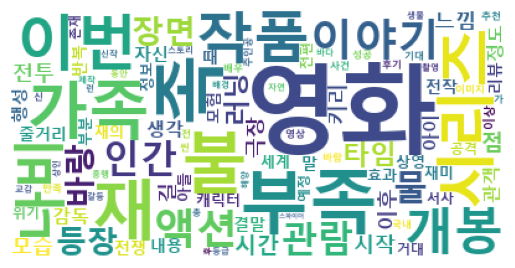

In [90]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()